In [3]:
import pandas as pd
import numpy as np

#pd.options.plotting.backend = "matplotlib"
pd.options.plotting.backend = "plotly"

In [26]:
df = pd.read_csv("YijinXRD.dat", sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = (patterns.values.T)[:, 1:]

for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000
    
#patterns = np.vstack((patterns[0][None, :], patterns))

In [27]:
from scipy.fft import fft, fftfreq, ifft, fft2, ifft2, ifftshift
from scipy.signal import blackman
import matplotlib.pyplot as plt
import matplotlib

from scipy.fftpack import fft, fftshift
from scipy.signal import butter
from scipy import signal
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
from scipy.ndimage import gaussian_filter as gf

from xrdc import featurization as feat
from xrdc import fourier

from importlib import reload
from xrdc import source_separation as sep
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

Interpolated background:

In [7]:
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

In [5]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns)

In [86]:
%matplotlib inline
sep.iplot_rows(slow_T.T, patterns.T, 'low-freq', 'full', log = False, offset = 0)

interactive(children=(IntSlider(value=298, description='i', max=597), Output(layout=Layout(height='550px'))), …

In [92]:
plt.rcParams["figure.figsize"]=(15, 9)

In [93]:
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

In [94]:
def annotate():
    plt.xlabel('q index')
    plt.ylabel('sample index')

In [107]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

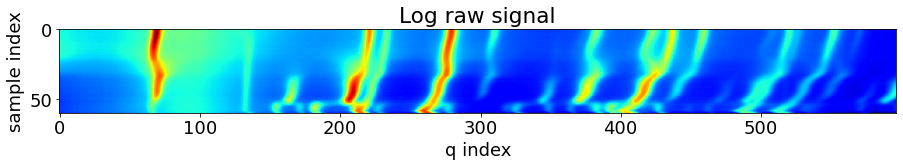

In [120]:
plt.imshow(np.log(1 + patterns), cmap = 'jet')
plt.title('Log raw signal')
annotate()

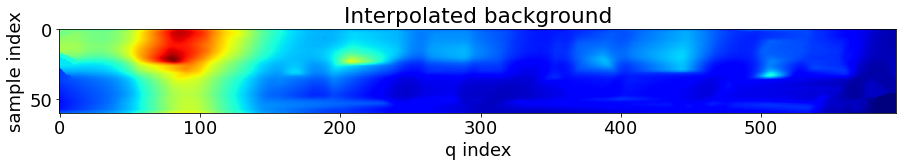

In [109]:
plt.imshow(slow_q, cmap = 'jet')
plt.title("Interpolated background")
annotate()

In [110]:
def norm(arr):
    return arr / arr.mean()

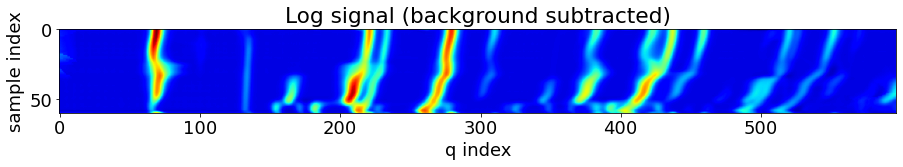

In [111]:
plt.imshow(np.log(1 + norm(fast_q - fast_q.min())), cmap = 'jet')
plt.title("Log signal (background subtracted)")
annotate()

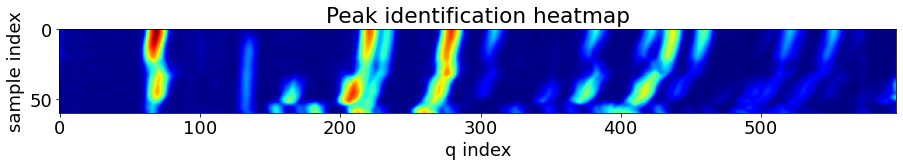

In [121]:
plt.imshow(np.log(1 + norm(sep.reference_bgsub(patterns))), cmap = 'jet')
plt.title("Peak identification heatmap")
annotate()

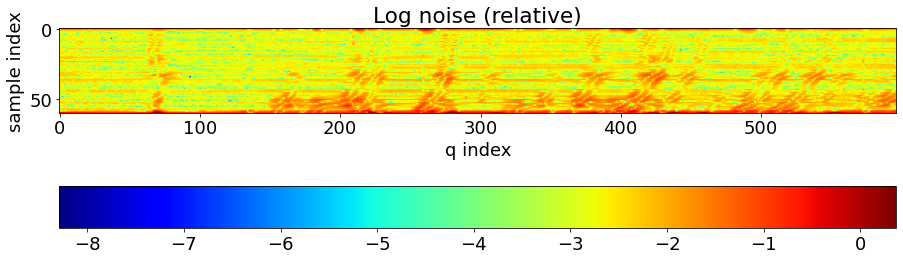

In [115]:
matplotlib.rcParams.update({'font.size': 18})
plt.imshow(np.log10(np.abs(fast_T / patterns)), cmap = 'jet')
plt.colorbar(orientation = 'horizontal')
plt.title("Log noise (relative)")
annotate()


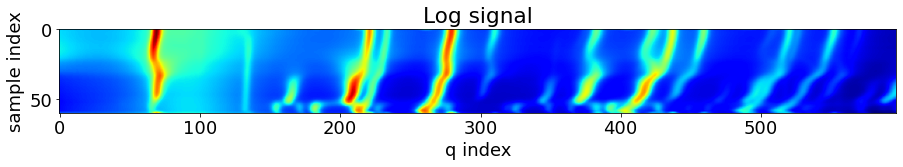

In [119]:
matplotlib.rcParams.update({'font.size': 18})
plt.imshow(np.log10((1 + slow_T)), cmap = 'jet')
plt.title("Log signal")
annotate()


In [10]:
imshow_log(fast_q)
plt.title("Background-subtracted signal")
plt.colorbar()

NameError: name 'imshow_log' is not defined

## high-T component

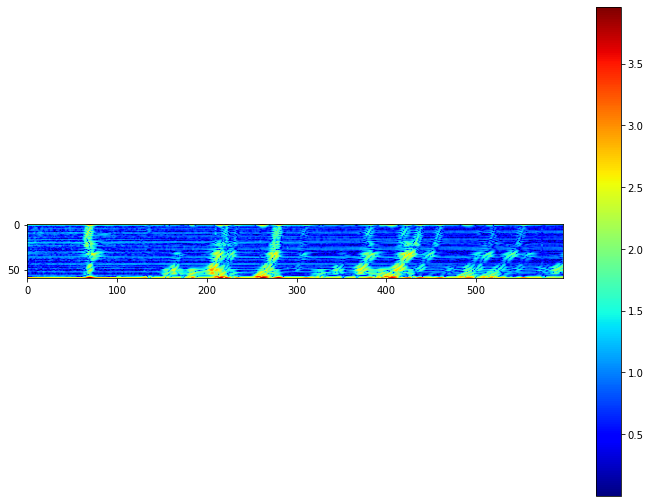

In [14]:
plt.imshow(np.log10(1 + np.abs(fast_T)), cmap = 'jet')
plt.colorbar()

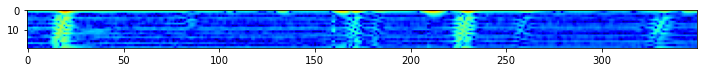

In [13]:
plt.imshow(np.log10(1 + np.abs(fast_T)[:20, 50:400]), cmap = 'jet')

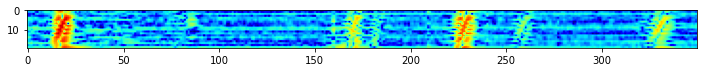

In [12]:
plt.imshow(np.log10(1 + np.abs(fast_T)[:20, 50:400]), cmap = 'jet')

Fast T (unscaled)

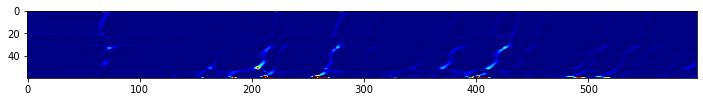

In [15]:
plt.imshow(((fast_T)), cmap = 'jet', vmin = fast_q.min() / 25, vmax = fast_q.max() / 25)
#plt.colorbar()

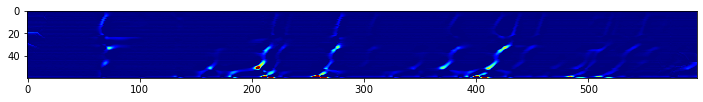

In [18]:
plt.imshow(((fast_T.T)), cmap = 'jet', vmin = fast_q.min() / 25, vmax = fast_q.max() / 25)
#plt.colorbar()

In [19]:
patterns.mean()

3433.502000091011

Fast T / total intensity

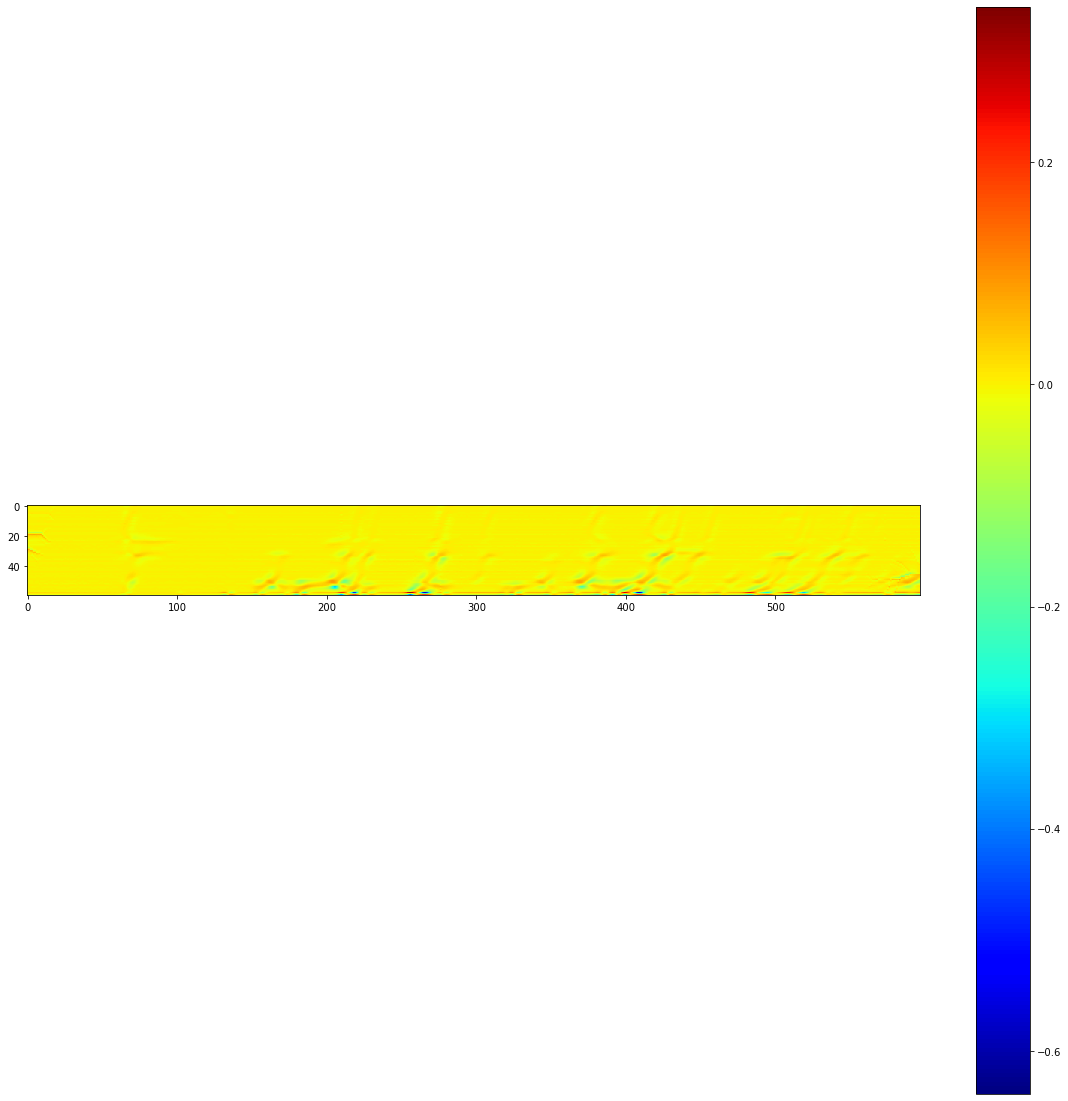

In [201]:
plt.imshow(((fast_T.T) / patterns), cmap = 'jet')#, vmin = fast_q.min() / 25, vmax = fast_q.max() / 25)
plt.colorbar()

Mask high-signal intensity regions. Red corresponds to 2% intensity relative to the total signal.

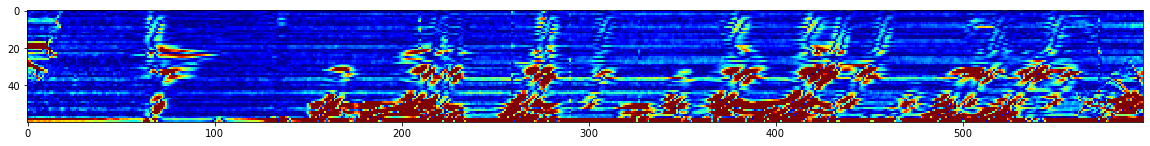

In [215]:
deviations = np.abs((fast_T.T) / (patterns + 1e-9))

deviations2 = deviations.copy()
plt.imshow(np.log(1+deviations2), cmap = 'jet', interpolation = 'none', vmax = .02)
#plt.colorbar()

In [683]:
(slow_T + fast_T)

array([[ 3.14335988e+02,  2.72895288e+02,  2.47327688e+02, ...,
         1.01874028e+00,  2.80357833e-01, -2.12449680e+00],
       [ 2.82110388e+02,  2.36304488e+02,  2.02204188e+02, ...,
        -2.27176760e-01, -1.21144921e+00, -2.32139384e+00],
       [ 2.71118988e+02,  2.22731488e+02,  2.04188288e+02, ...,
        -5.57910711e+00, -4.65205996e+00, -4.72061124e+00],
       ...,
       [-1.19847045e+01, -9.53523360e+00, -1.05960114e+01, ...,
         4.35783989e+02,  5.26335589e+02,  6.09970889e+02],
       [ 3.85726734e+01,  4.17913760e+01,  4.35732478e+01, ...,
         4.06591289e+02,  5.07919689e+02,  6.14991289e+02],
       [-6.19948982e+01, -5.88615925e+01, -5.94914234e+01, ...,
        -4.43947109e+01, -3.01302109e+01,  1.27136891e+01]])

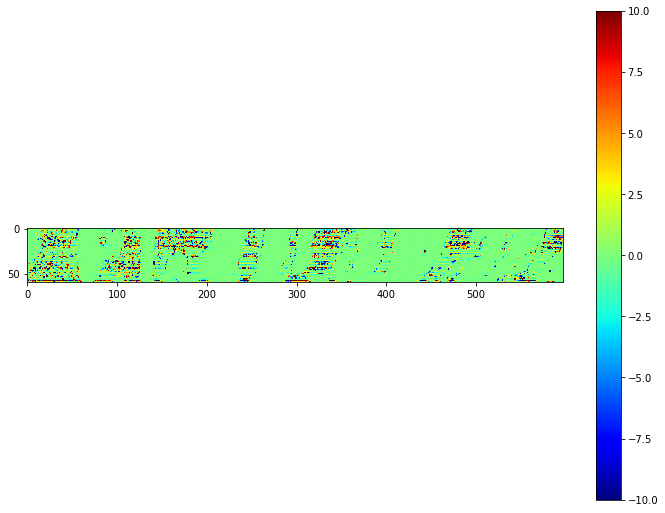

In [78]:
plt.imshow(((fast_T.T / slow_T.T)), cmap = 'jet', vmin = -10, vmax = 10)
plt.colorbar()

Text(0.5, 1.0, 'High-T distribution')

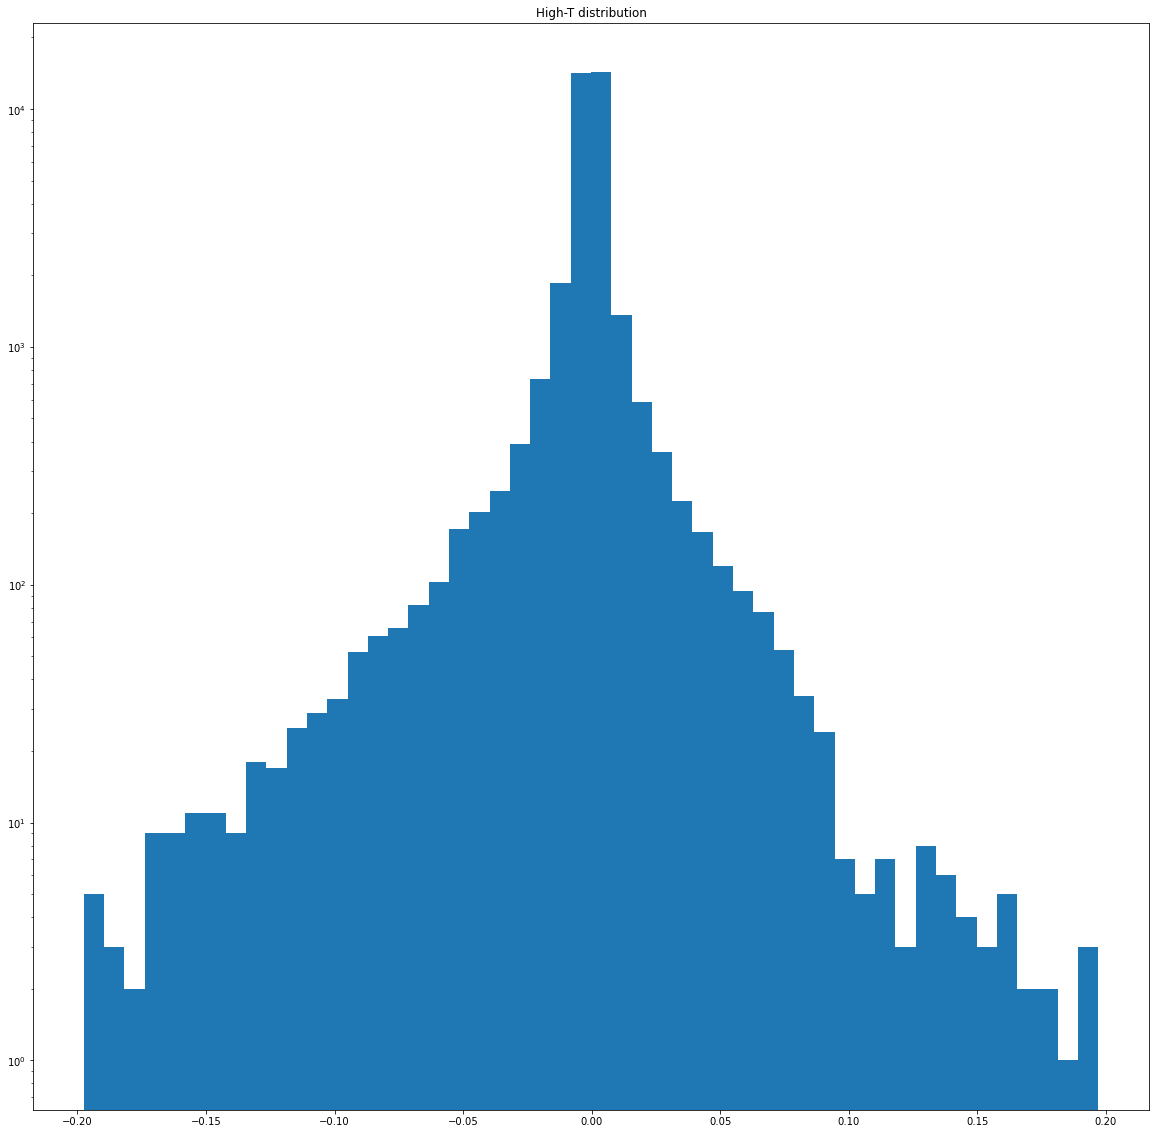

In [213]:
tmp = ((fast_T.T / patterns).ravel())
tmp = tmp[((tmp < .2) & (tmp > -.2))]
# tmp[tmp < 20] = 0
#tmp[tmp > 20] = 0
plt.hist(tmp, bins = 50);
plt.semilogy()
plt.title('High-T distribution')

In [31]:
patterns.shape, fast_T.shape

((60, 597), (60, 597))

## Noise estimation:

In [20]:
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

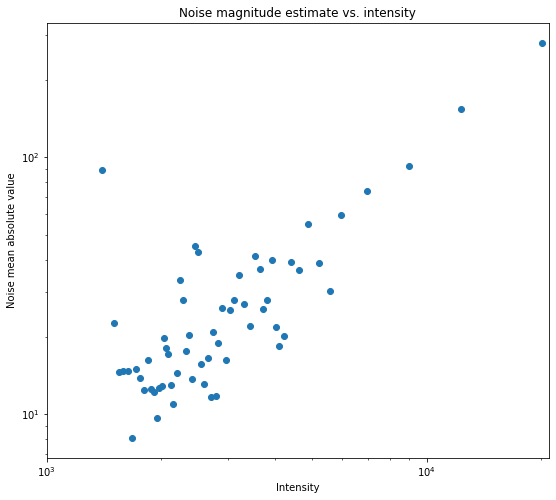

In [22]:
%matplotlib inline

intensities = patterns.ravel()
# intensities = patterns[:20, 50:400].ravel()
# intensities = slow_T.T[:20, 50:400].ravel()
# intensities = slow_T.T.ravel()

# absolute deviation
noise = np.abs(fast_T.ravel())
# noise = fast_T.T[:20, 50:400].ravel()
# noise = fast_T.T.ravel()

sorter = np.argsort(intensities)

nsplit = 60
splitsort = np.split(sorter, nsplit)
splitintensity = [(intensities[idxs]).ravel().mean() for idxs in splitsort]

# mean absolute values of the high-T noise
splitmean = [np.abs(noise[idxs]).ravel().mean() for idxs in splitsort]
splitstd = [(noise)[idxs].std() for idxs in splitsort]

logsplitintensity, logsplitstd = np.log10(splitintensity), np.log10(splitstd)

plt.rcParams["figure.figsize"]=(9, 8)
#plt.plot(splitintensity, splitmean, 'o')
plt.plot(splitintensity, splitmean, 'o')
plt.xlim(1000, None)
# plt.ylim(1, None)
#plt.plot(splitstd, 'o')
plt.semilogx()
plt.semilogy()
plt.xlabel('Intensity')
plt.ylabel('Noise mean absolute value')
plt.title("Noise magnitude estimate vs. intensity")
matplotlib.rcParams.update({'font.size': 24})

In [283]:
(np.log10(3770) - np.log10(1915)) / (np.log10(86.9)  - np.log10(25.4))

0.5506930899609576

In [376]:
from scipy.optimize import curve_fit

(0.0, 2.0015057784771293)

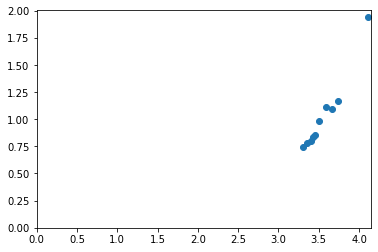

In [325]:
%matplotlib inline
plt.plot(logsplitintensity, logsplitstd, 'o')
plt.xlim(0, None)
plt.ylim(0, None)

In [348]:
logsplitintensity

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.14371509,  0.31963676,  0.64774851,  0.94605029,  1.25740897,
        1.53335082,  1.77756545,  1.98455362,  2.16477455,  2.33155947,
        2.48123401,  2.62553965,  2.77070522,  2.90339316,  3.03228805,
        3.15804156,  3.30205018,  3.46464725,  3.72704333,  4.12120982])

In [377]:
# curve_fit(lambda x, a, b: a + b * x, logsplitintensity[5:-5], logsplitstd[5:-5])
curve_fit(lambda x, a, b: a + b * x, logsplitintensity[17:], logsplitstd[17:])

(array([-2.67547914,  1.29106279]),
 array([[ 0.26418186, -0.07204389],
        [-0.07204389,  0.01970491]]))

{\displaystyle \operatorname {E} [|X-\lambda |]={\frac {2\lambda ^{\lfloor \lambda \rfloor +1}e^{-\lambda }}{\lfloor \lambda \rfloor !}}.}

In [389]:
np.power?

In [397]:
import scipy

In [398]:
def mad(lam):
    return 2 * np.exp(-lam) * np.power(lam, (np.floor(lam) + 1)) /  scipy.special.factorial(np.floor(lam))

In [396]:
np.math.factorial([1, 2])

TypeError: an integer is required (got type list)

In [403]:
gridlam = np.arange(1, 140)

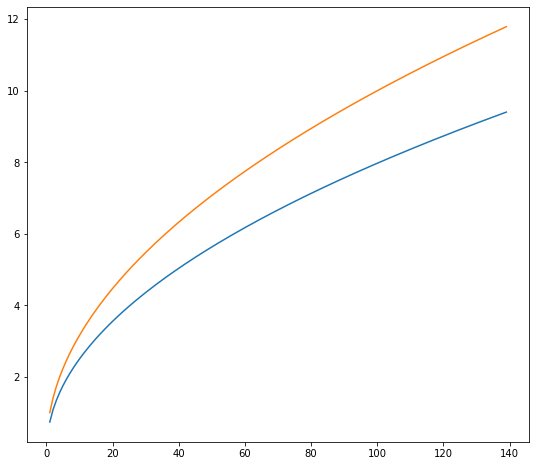

In [405]:
plt.plot(gridlam, mad(gridlam))
plt.plot(gridlam, np.sqrt(gridlam))

## Uncertainty propagation

In [137]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True, size_thresh = 10, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 1, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1

In [146]:
patterns_pp = slow_T.T.copy()
patterns_pp[patterns_pp < 0] = 0

Peak at 69, start iteration with error = 0.7072165695964187
Peak at 69, iteration 0: error = 213.9948301635603
Peak at 68, start iteration with error = 0.6221062553786476
Peak at 68, iteration 0: error = 241.56778804636477
Peak at 276, start iteration with error = 0.7052741702394918
Peak at 276, iteration 0: error = 156.54568174553464
Peak at 276, start iteration with error = 0.6357880514720367
Peak at 276, iteration 0: error = 280.61456147523717
Peak at 210, start iteration with error = 0.6384400255610315
Peak at 210, iteration 0: error = 320.5247499395546
Peak at 207, start iteration with error = 0.6880617523120018
Peak at 207, iteration 0: error = 249.247783235442
29
0.05383870857789993


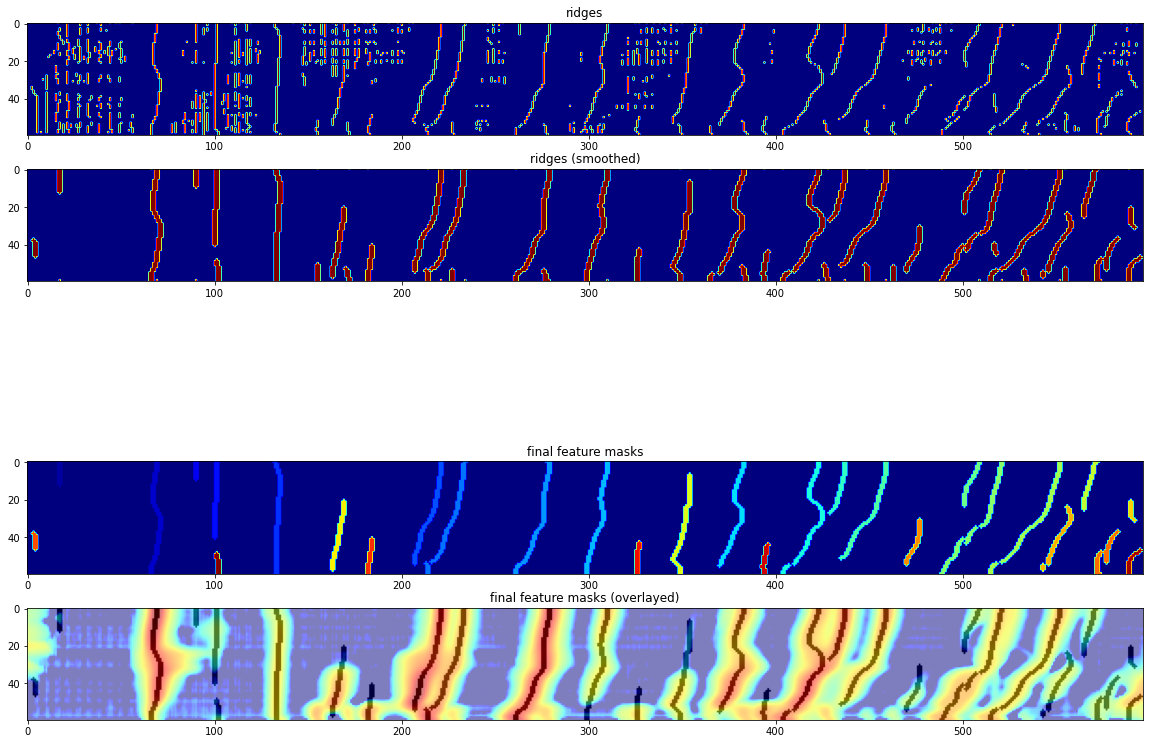

In [147]:
labeled, feature_masks, activations, _norm, activations_n1 = default_featurize(patterns_pp);

In [148]:
patterns_pp.min()

0.0

{'linkage': 'ward', 'affinity': 'euclidean'}



    Similarity type: Cosine

    Scaling: linear
    
    Clustering type: agglom
    
    Linkage: ward
    

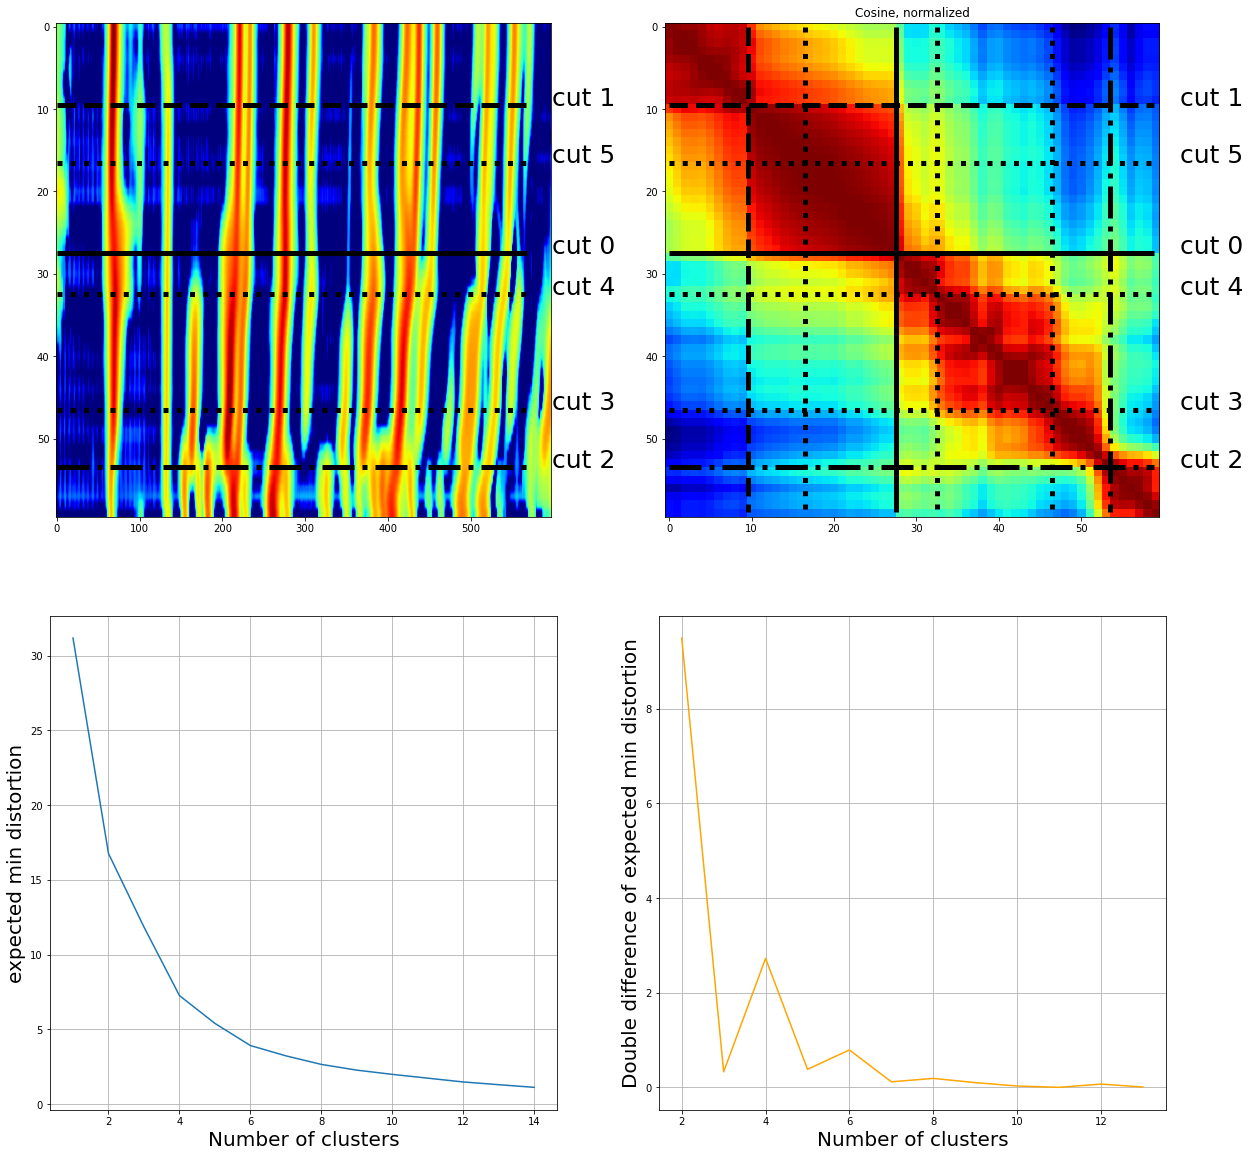

In [151]:
results = []

simtype = 'Cosine'
scaling = 'linear'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns_pp, activations_n1, activations_n1, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')
results.append({'simtype': simtype, 'scaling': scaling, 'linkage': linkage, 'ctype': ctype, 'cut_coords': o_cuts})
feat.printinfo(simtype, scaling, linkage, ctype)

In [165]:
#activations_noise = feat.featurize(feature_masks, fast_T.T)
activations_noise = feat.featurize(feature_masks, np.percentile(np.abs(fast_T.T), 68) * np.ones_like(fast_T.T))

13.150331371941792
0.05383870857789993
13.150331371941792
13.150331371941792


Text(0.5, 1.0, 'features')

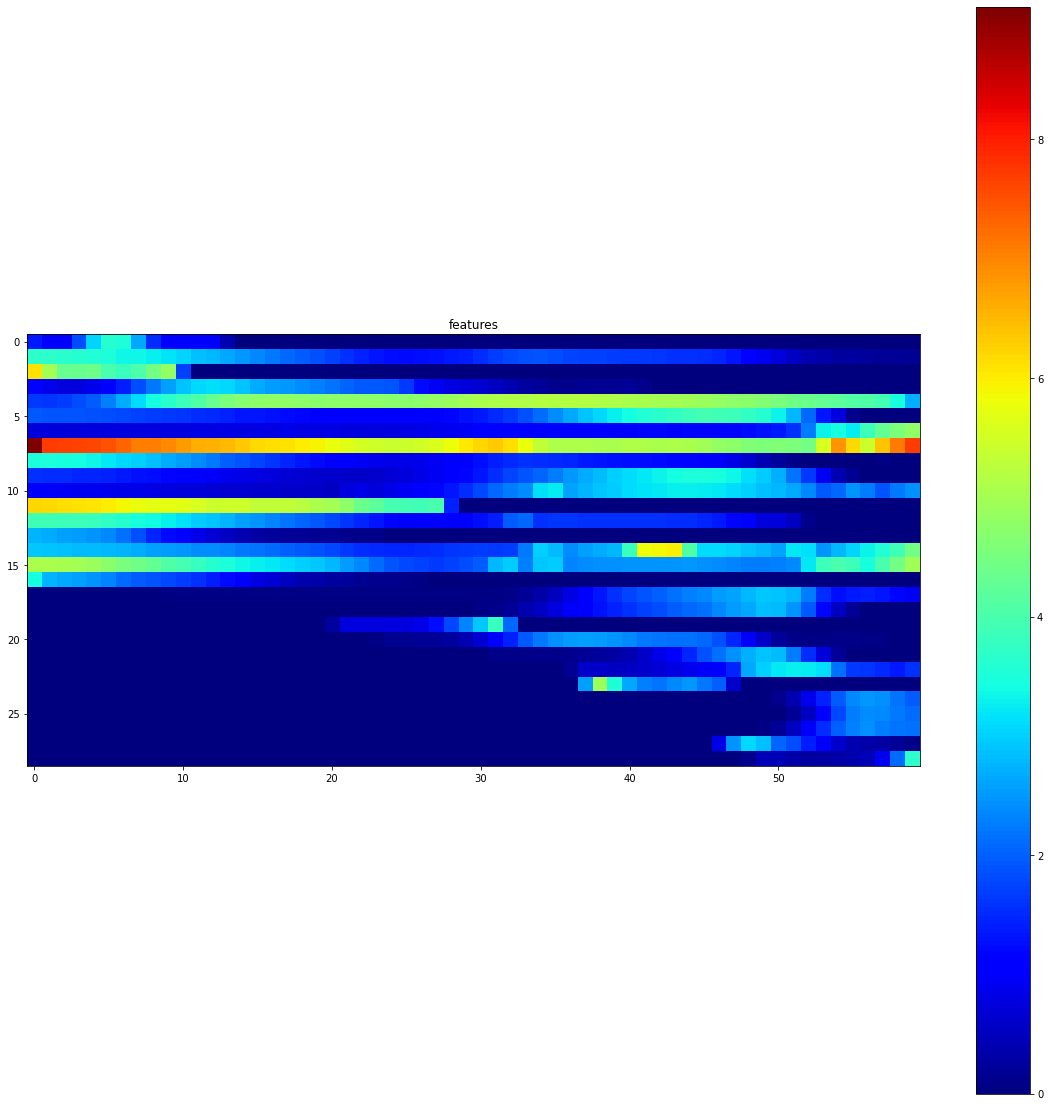

In [176]:
do_norm = True

if do_norm:
    uncertainty = np.abs((_norm(activations + activations_noise) - _norm(activations)))
    fractional_uncertainty = uncertainty / (_norm(activations + activations_noise) + 1e-9)
else:
    uncertainty = np.abs((( activations_noise)))
    fractional_uncertainty = uncertainty / ((activations) + 1e-9)
    
if do_norm:
    plt.imshow(_norm(activations + activations_noise), cmap = 'jet')
else:
    plt.imshow((activations), cmap = 'jet')
plt.colorbar()
plt.title('features')

Text(0.5, 1.0, '')

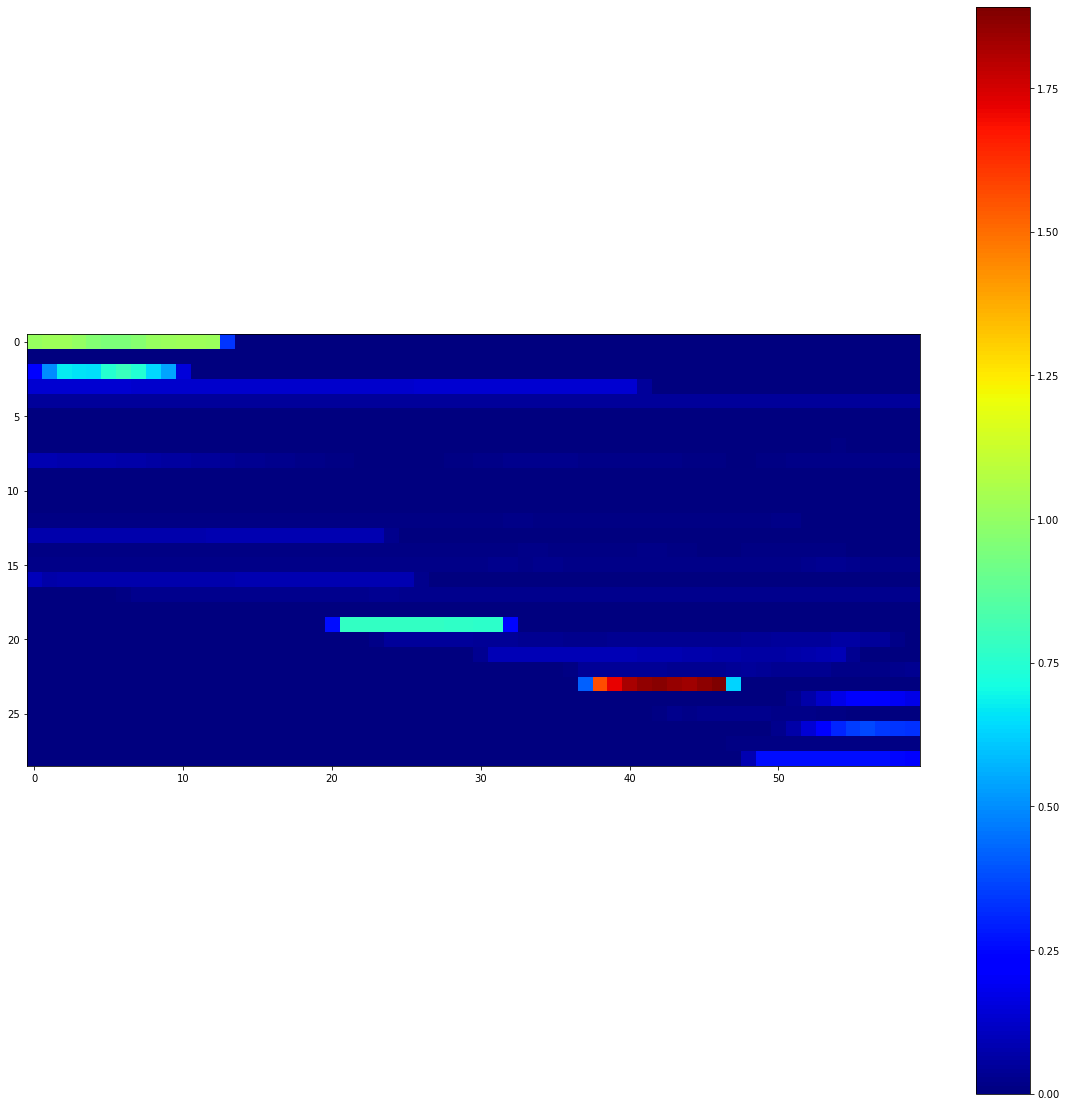

In [177]:
plt.imshow(uncertainty, cmap = 'jet')
plt.colorbar()
plt.title('')

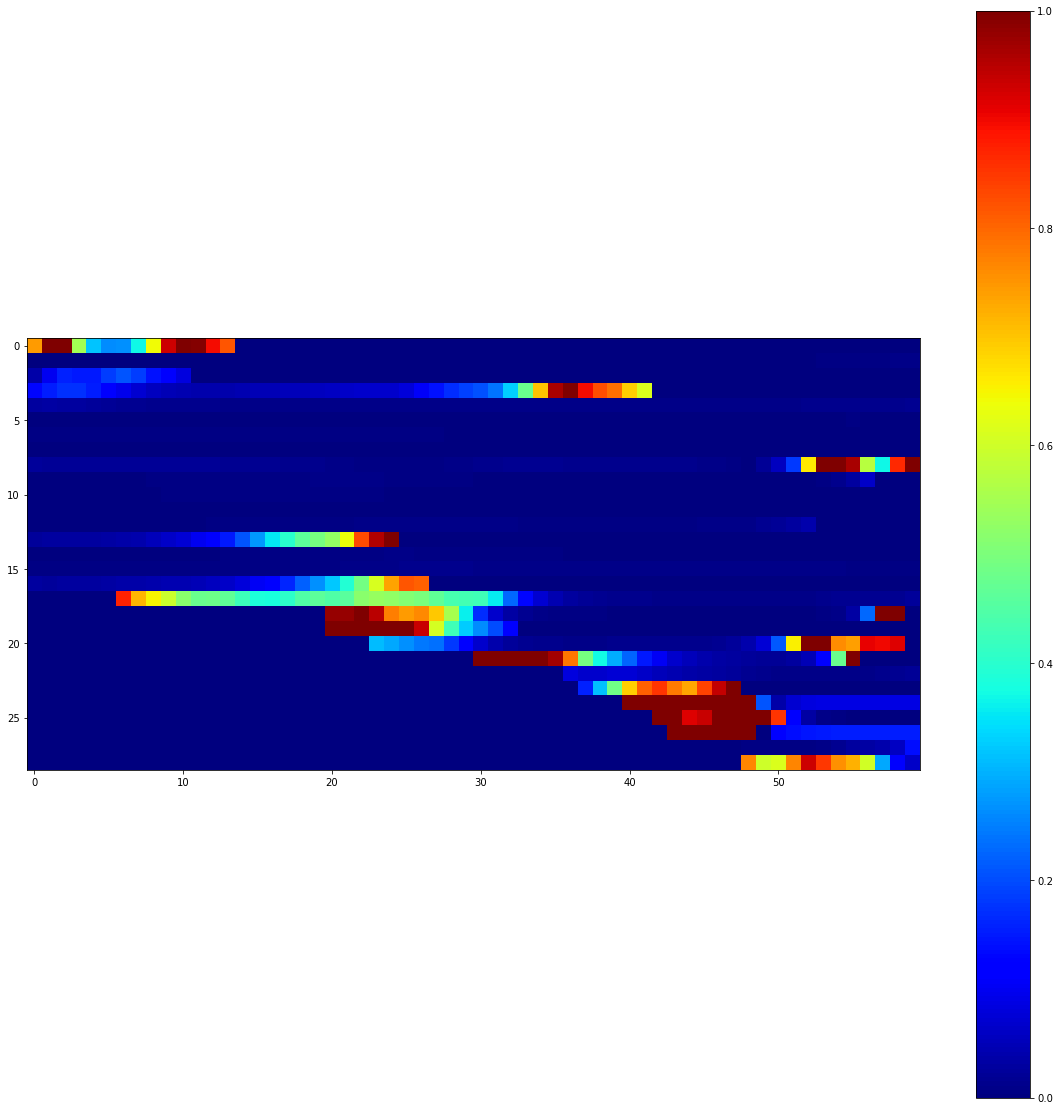

In [178]:
plt.imshow(fractional_uncertainty, cmap = 'jet', vmax = 1)
plt.colorbar()

In [184]:
feature_mask = ~(fractional_uncertainty.max(axis = 1) > .5)

In [192]:
feature_mask.sum()

14

{'linkage': 'ward', 'affinity': 'euclidean'}


Text(0.5, 1.0, 'masked features')

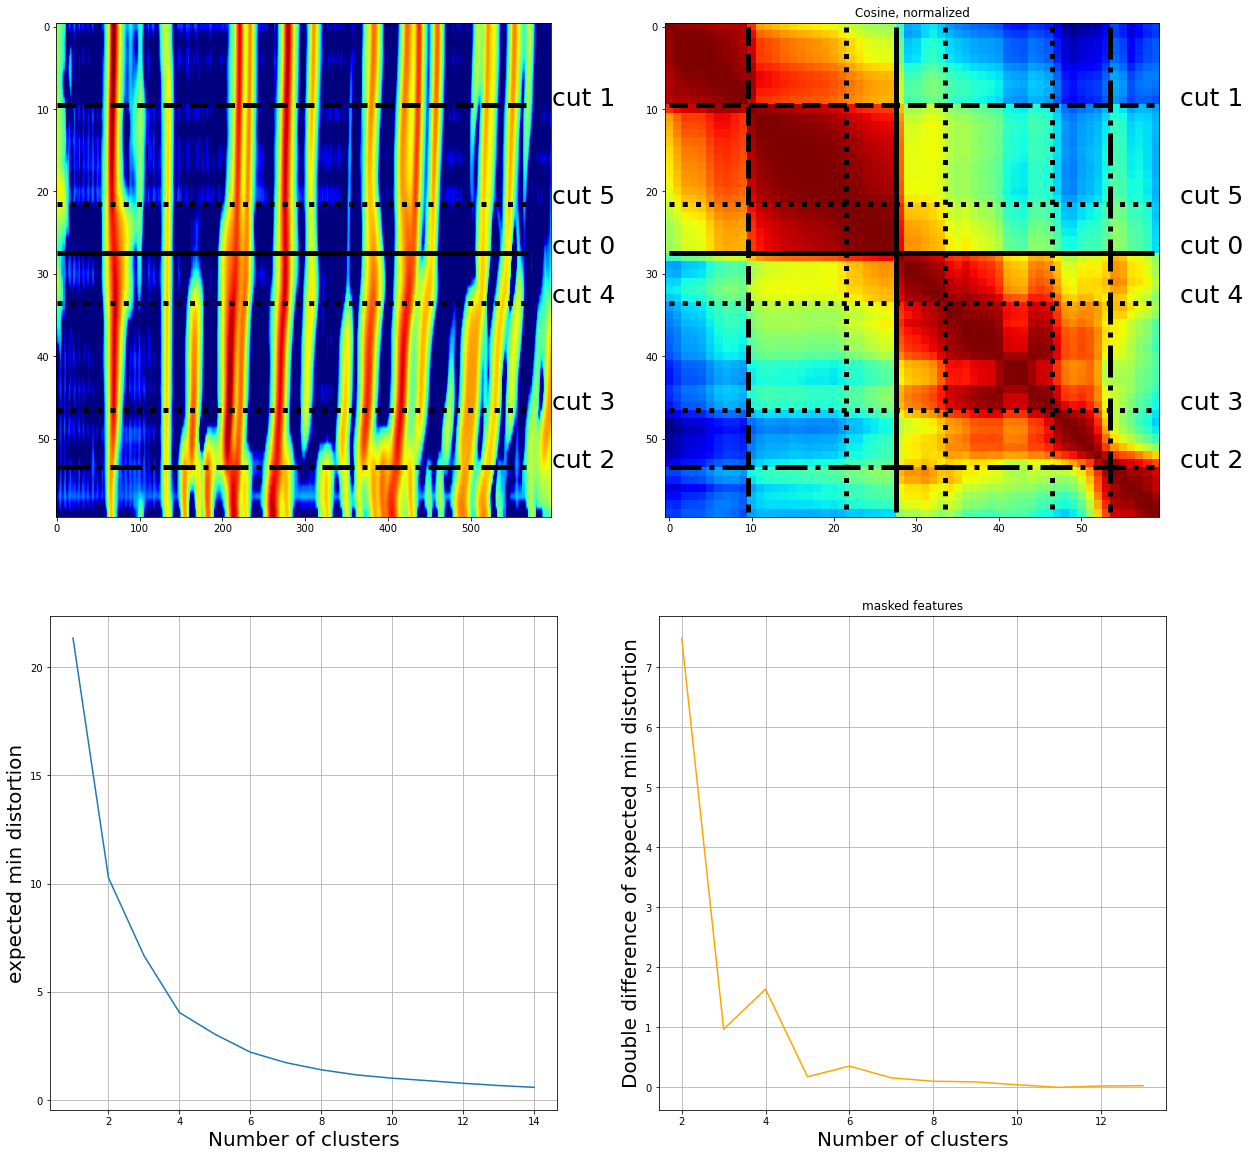

In [194]:
results = []

simtype = 'Cosine'
scaling = 'linear'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns_pp, activations_n1[feature_mask], activations_n1[feature_mask],
                                                   n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')
results.append({'simtype': simtype, 'scaling': scaling, 'linkage': linkage, 'ctype': ctype, 'cut_coords': o_cuts})
feat.printinfo(simtype, scaling, linkage, ctype)
plt.title('masked features')

In [191]:
activations_n1[feature_mask].shape

(14, 60)

# 3d dataset

In [15]:
from xrdc.datasets import d3d


patterns = m3d = d3d.get_data()
arr2d = patterns[:, :, 200]

Loading Data from: /Users/ollie/Documents/SLAC/xrd_clustering/notebooks/../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [16]:
def pad_2d(arr, padsize):
    n, m = arr.shape
    newn, newm = n + padsize, m + padsize
    newarr = np.zeros((newn, newm))
    newarr[padsize // 2: padsize // 2 + n, padsize // 2: padsize // 2 + m] = arr
    return newarr

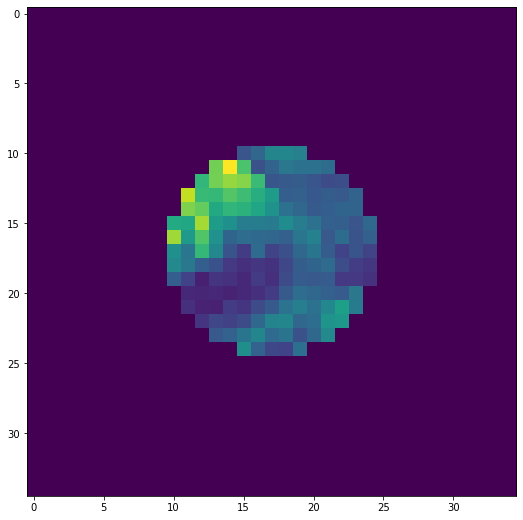

In [17]:
plt.imshow(pad_2d(patterns[:, :, 200], 20))

In [15]:
#https://stackoverflow.com/questions/3662361/fill-in-missing-values-with-nearest-neighbour-in-python-numpy-masked-arrays
from scipy import ndimage as nd

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    print(ind.shape)
    return data[tuple(ind)]

In [19]:
reload(sep)
reload(sep.fourier)
reload(sep)

AttributeError: module 'xrdc.source_separation' has no attribute 'fourier'

mark

## Create synthetic background:

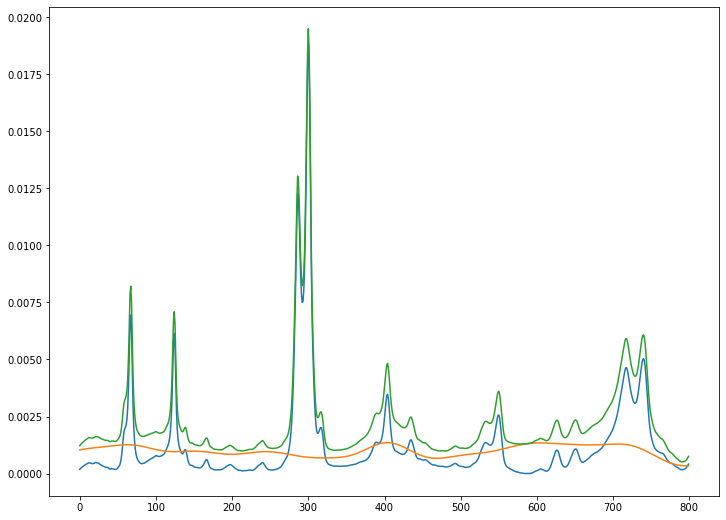

In [546]:
bgq = xdu.mk_generate_peak_scales(np.arange(patterns.shape[2]), sigma_peakvar=40, scale = 1, clip = False)() - 1
bgx = xdu.mk_generate_peak_scales(np.arange(patterns.shape[0]), sigma_peakvar=1, scale = 1, clip = False)(patterns.shape[0]) - 1
bgy = xdu.mk_generate_peak_scales(np.arange(patterns.shape[1]), sigma_peakvar=1, scale = 1, clip = False)(patterns.shape[1]) - 1

# simulated three-dimensional background that factors into 3 gp posteriors
#bg3d = np.outer(bgx, bgy)[:, :, None] * bgq[None, None, :]

bg3d = (bgx[:, None, None] / 2 + bgy[None, :, None] / 2 + bgq[None, None, :])
bg3d -= bg3d.min()
bg3d *= (patterns.mean() / bg3d.mean())
bg3d = bg3d * wafer_mask[:, :, None]

plt.plot(patterns[5, 5, :])
plt.plot(bg3d[5, 5, :])
plt.plot(patterns[5, 5, :] + bg3d[5, 5, :])

In [47]:
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

In [23]:
# slow_q, fast_q, slow_T, fast_T = sep.separate_signal_2(patterns + bg3d, cutoff = .25,  threshold = 50)
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7)

In [24]:
fast_T.shape

(60, 597)

In [25]:
fast_T.shape

(60, 597)

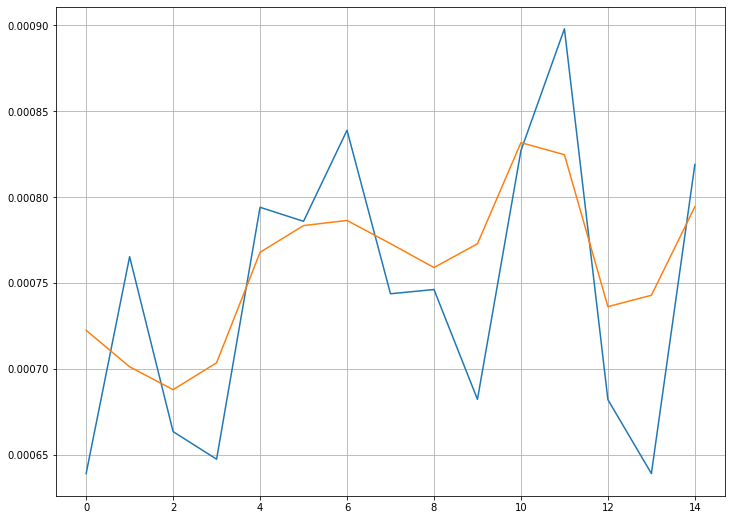

In [20]:
plt.plot((patterns)[:, 5, 100])
plt.plot(slow_T[:, 5, 100])
plt.grid()

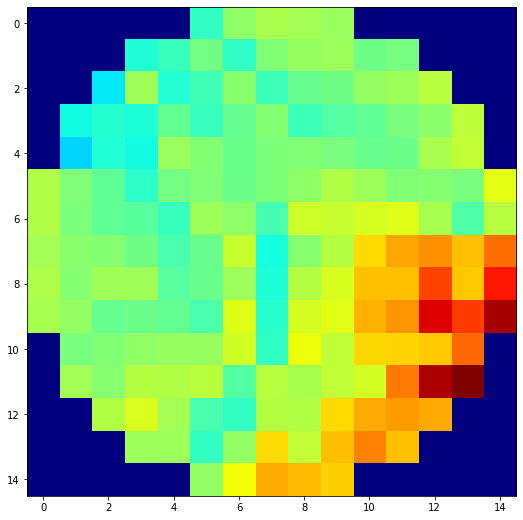

In [21]:
plt.imshow((patterns)[:, :, 100], cmap = 'jet')

In [25]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def iplot_cuts(patterns, label1 = 'raw',
              log = False, offset = 0, height = '550px'):
    plt.rcParams["figure.figsize"]=(12, 9)
    def f(i):
        if log:
            plt.semilogy()
        plt.imshow(patterns[:, :, i] + offset, label = label1, cmap = 'jet')

    interactive_plot = interactive(f, i=(0, len(patterns[0][0])), step = 1)
    output = interactive_plot.children[-1]
    output.layout.height = height
    return interactive_plot

In [37]:
iplot_cuts(slow_T)

interactive(children=(IntSlider(value=400, description='i', max=800), Output(layout=Layout(height='550px'))), …

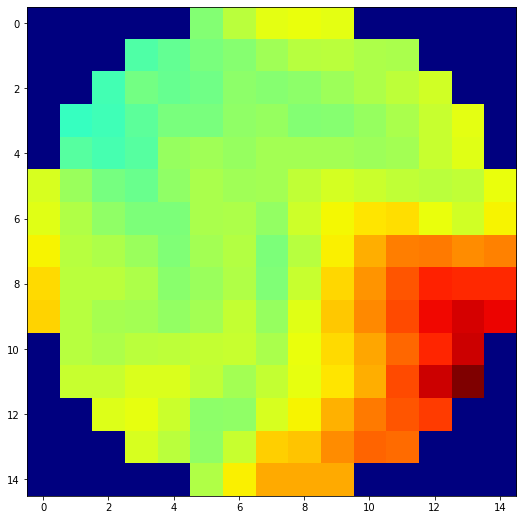

In [33]:
plt.imshow(slow_T[:, :, 100], cmap = 'jet')

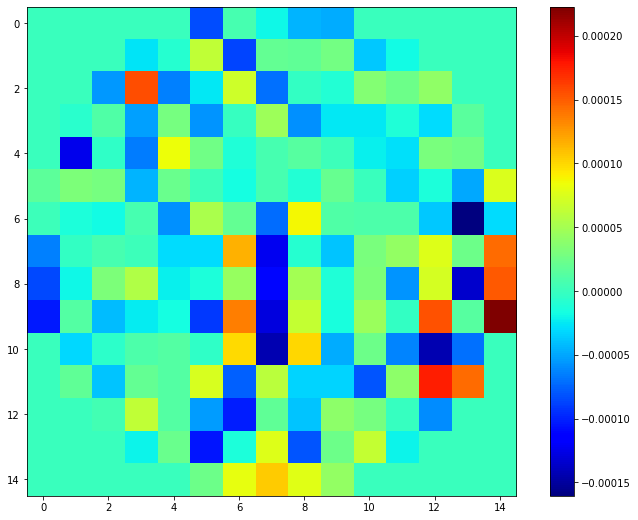

In [34]:
plt.imshow(fast_T[:, :, 100], cmap = 'jet')
plt.colorbar()

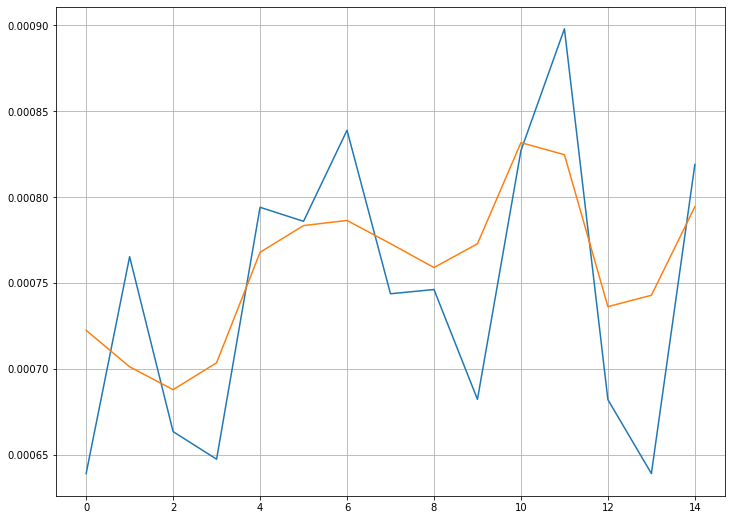

In [20]:
plt.plot((patterns)[:, 5, 100])
plt.plot(slow_T[:, 5, 100])
plt.grid()

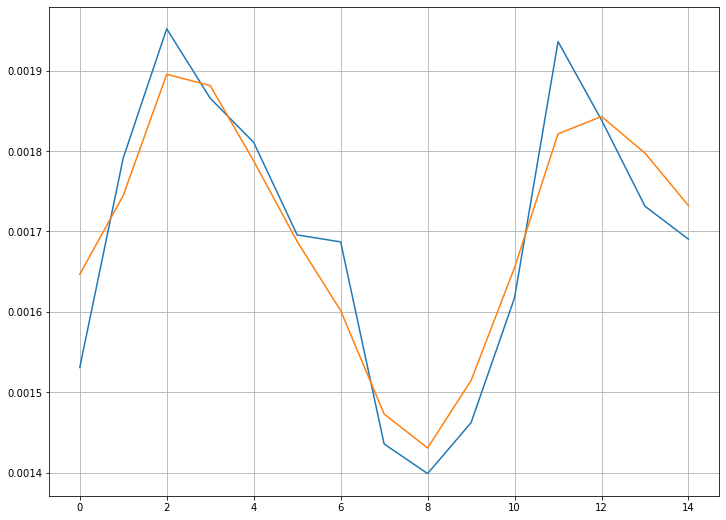

In [532]:
plt.plot((patterns + bg3d)[:, 5, 100])
plt.plot(slow_T[:, 5, 100])
plt.grid()

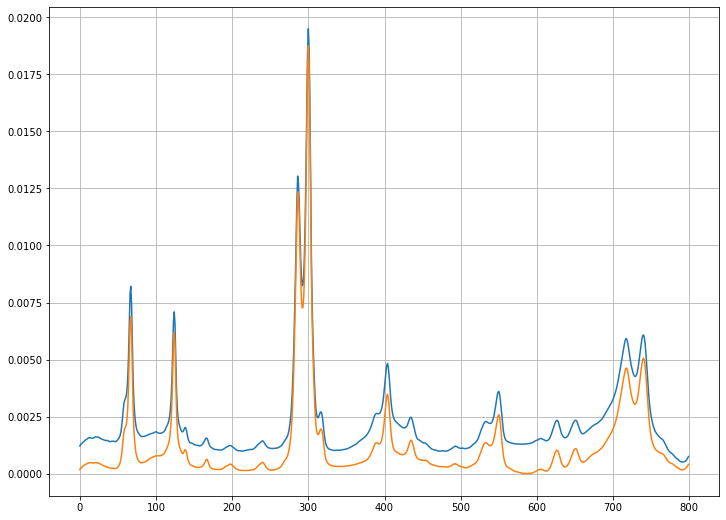

In [642]:
plt.plot((patterns + bg3d)[5, 5, :])
plt.plot(slow_T[5, 5, :])
plt.grid()

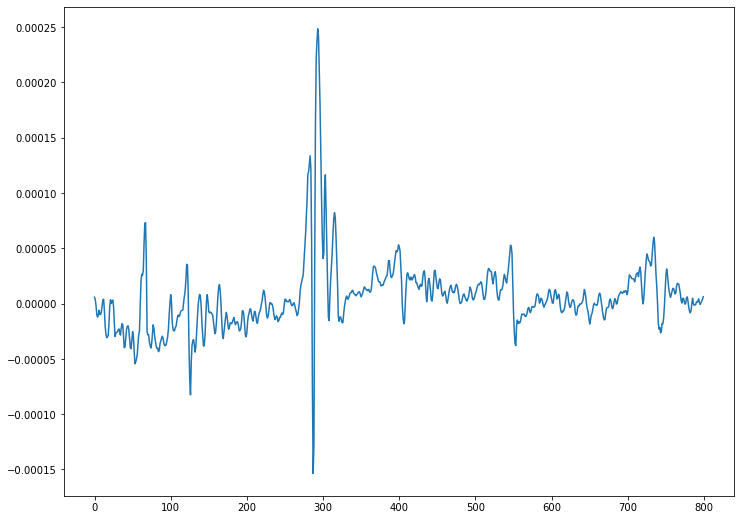

In [530]:
plt.plot(fast_T[5, 5, :])

## X Y filter

In [21]:
from xrdc import source_separation as sep

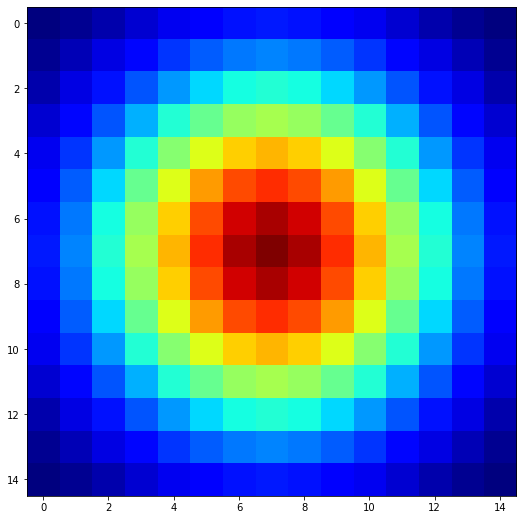

In [22]:
plt.imshow((sep.gauss_low_Nd(arr2d, .25)), cmap = 'jet')

## Raw data

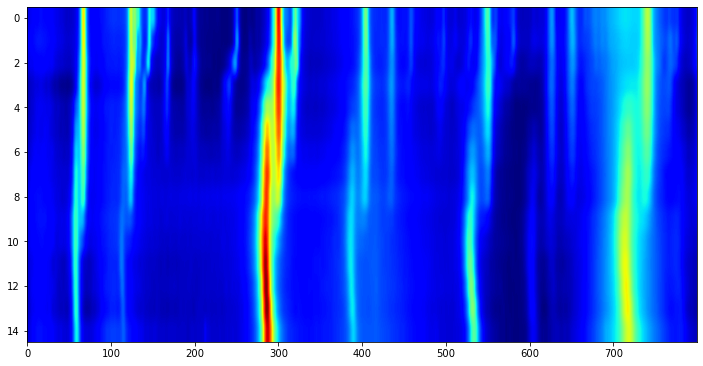

In [23]:
aspect = 800 / 30
plt.imshow(np.log(.001 + patterns[5, :, :]), cmap = 'jet', aspect = aspect)

## Extracted high-frequency (q) component:

In [25]:
extracted_highQ = sep.reference_bgsub(patterns)

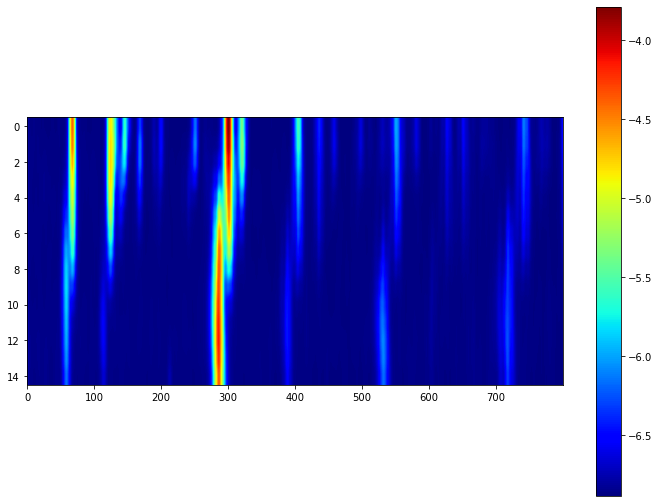

In [26]:
plt.imshow(np.log(.001 + extracted_highQ[5, :, :]), cmap = 'jet', aspect = aspect)
plt.colorbar()

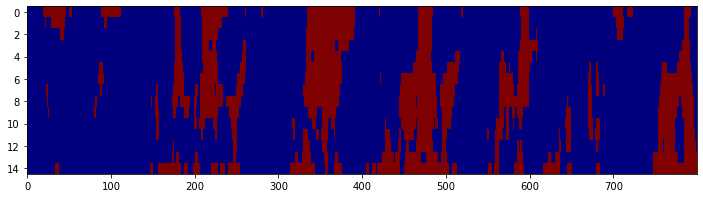

In [27]:
plt.imshow(np.log(.001 + sep.get_bgmask(patterns, 33)[5, :, :]), cmap = 'jet', aspect = aspect / 2, interpolation = 'none')

## Interpolated background:

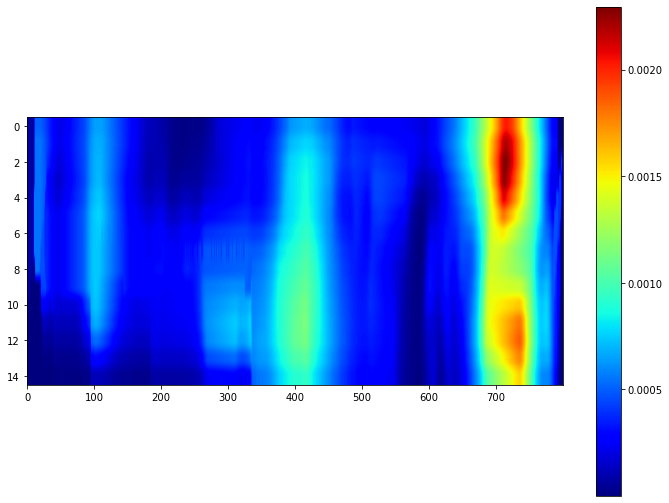

In [28]:
plt.imshow(sep.get_background(patterns, threshold = 50)[5, :, :], cmap = 'jet', aspect = aspect)
plt.colorbar()

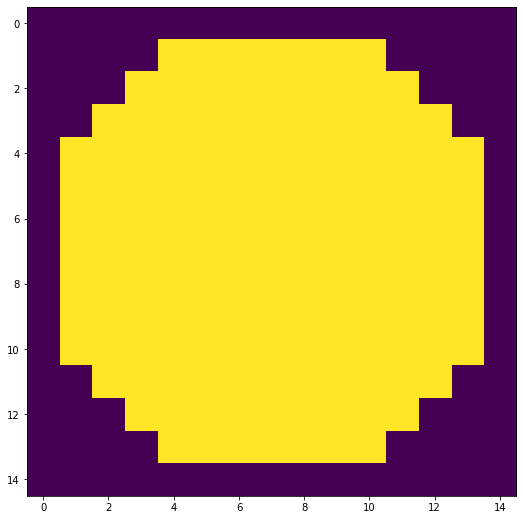

In [31]:
plt.imshow(sep.draw_circle(arr2d, 7))

Gaussian envelope

Test centering

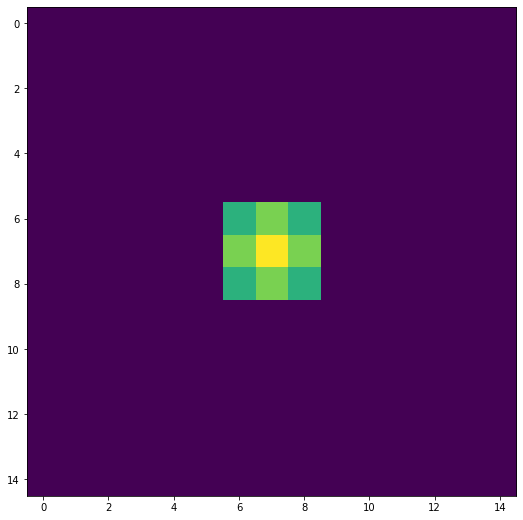

In [34]:
plt.imshow((sep.gauss_low_Nd(arr2d, .1)) * sep.draw_circle(arr2d, 2))

(2, 15, 15)


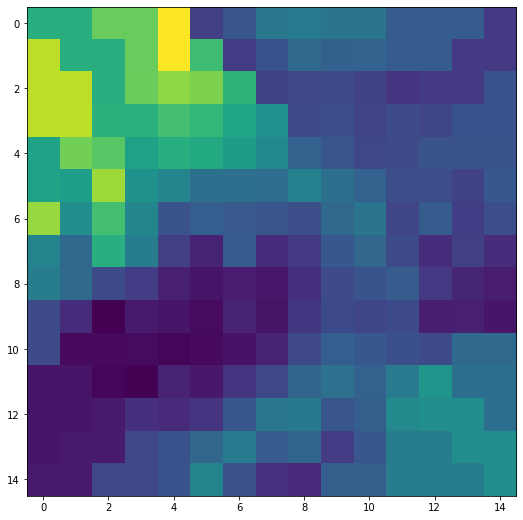

In [287]:
plt.imshow(fill(arr2d, arr2d == 0))

In [809]:
from numpy.fft import fftn, ifftn

In [794]:
# from functools import reduce
def gaussNd(sigma):
    """
    Returns a function that's a gaussian over a cube of coordinates
    of any dimension.
    """
    N = 1 / (sigma * np.sqrt(2 * np.pi))
    def f(*args):
        n = args[0].shape[0]
        def g(*args2):
            args_sq = (np.array(args2) * np.array(args2)).sum(axis = 0)
            return np.exp(- args_sq / (2 * sigma**2))
        # TODO check the offset
        x0 = (n  -1) / 2
        return N * g(*(arg - x0 for arg in args))
    return f

In [750]:
def lowpass2d(arr, cutoff, mode = 'gaussian'):
    """
    Low pass filter with a circular step aperture
    """
    if mode == 'step':
        mask = draw_circle(arr, int(cutoff * ((arr.shape[0] + arr.shape[1]) / 2)))
    elif mode == 'gaussian':
        mask = gauss_low_2d(arr, cutoff)
        mask /= mask.max()
    else:
        raise ValueError
    arrfft = fftshift(fft2(arr))
    arr_filtered = ifft2(ifftshift(mask * arrfft))
    return arr_filtered

In [501]:
nq = patterns.shape[-1]
low_xy = np.zeros_like(patterns)
wafer_mask = (patterns.sum(axis = 2) != 0)
for i in range(nq):
    low_xy[..., i] = np.absolute(sep.lowpass2d(sep.fill(patterns[..., i], arr2d == 0), .2, 'gaussian')) * wafer_mask

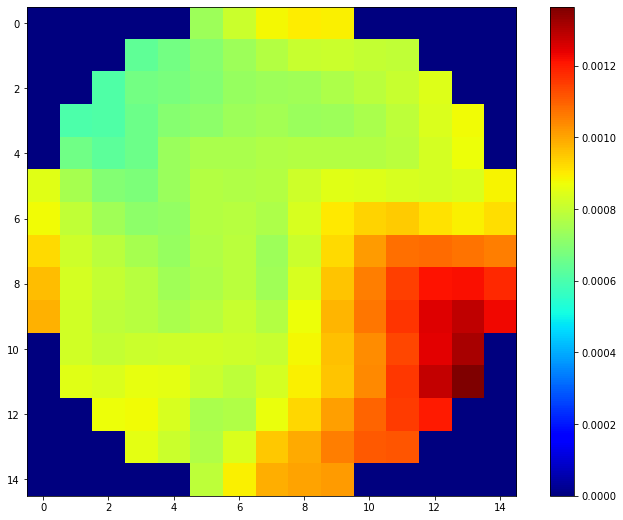

In [502]:
plt.imshow(low_xy[:, :, 100], cmap = 'jet')
plt.colorbar()

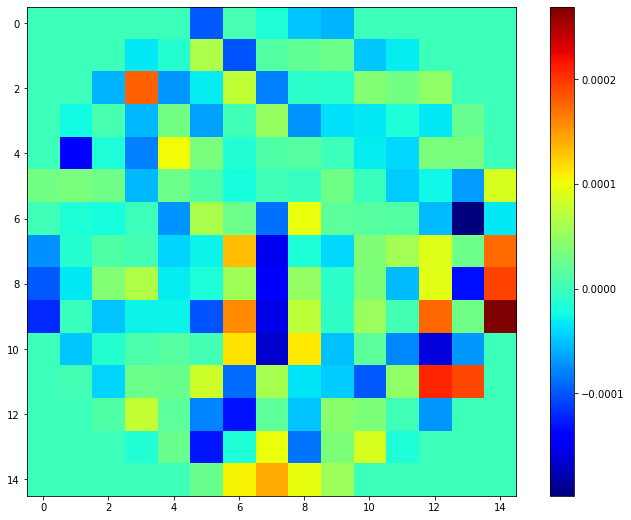

In [503]:
plt.imshow(patterns[:, :, 100] - low_xy[:, :, 100], cmap = 'jet')
plt.colorbar()

In [484]:
circle = draw_circle(patterns[:, :, 100], int(.2 * ((patterns[:, :, 100].shape[0] + patterns[:, :, 100].shape[1]) / 2)))

In [37]:
# fill unpopulated elements of the xy cut with nearest neighbor value
filled = fill(arr2d, arr2d == 0)

(2, 15, 15)


(2, 15, 15)


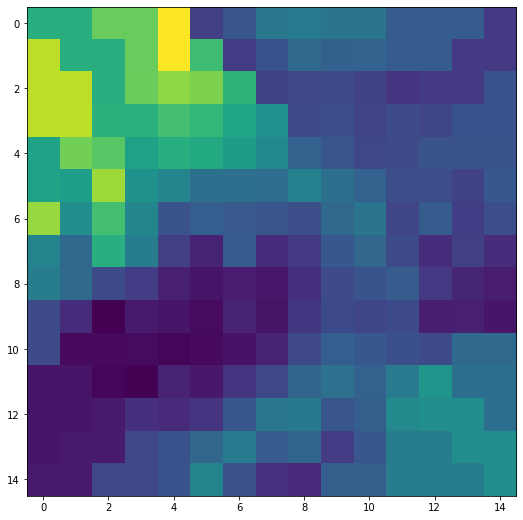

In [36]:
plt.imshow(filled)

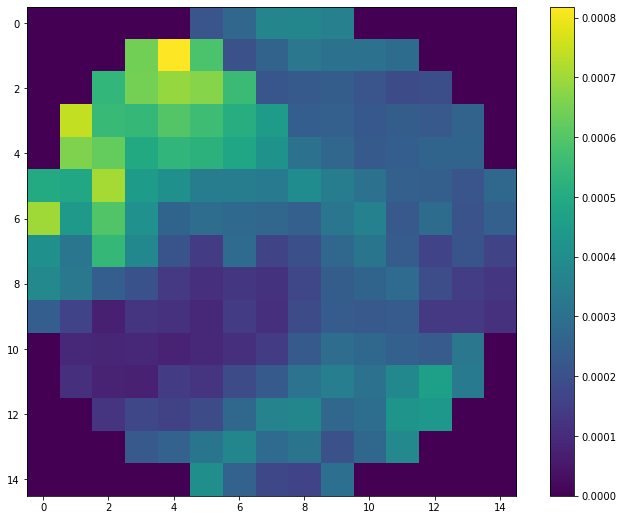

In [38]:
plt.imshow(arr2d)
plt.colorbar()

## TODO: how does gaussian filter differ from step function, for filtering in T?

-think gaussian has fewer artifacts, but need to document/confirm

In [7]:
m3d.shape

(15, 15, 800)

In [11]:
patterns.shape

(15, 15, 800)

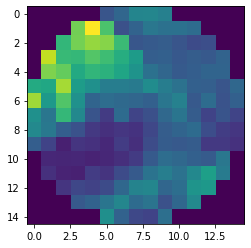

In [15]:
plt.imshow(patterns[:, :, 200])

In [ ]:
fft2

In [6]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns)

NameError: name 'sep' is not defined

In [44]:
from xrdc import xrdutils as xdu

In [84]:
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

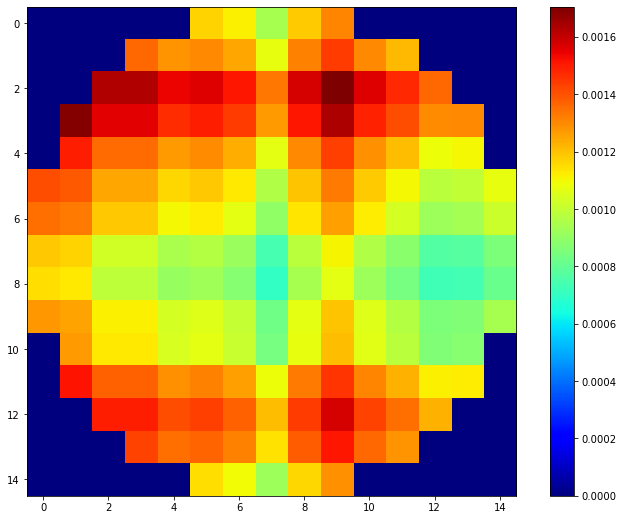

In [174]:
plt.imshow(bg3d[:, :, 200], cmap = 'jet')
plt.colorbar()